## Exploratory Data Analysis 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Reading the dataset
df = pd.read_excel('movie_reviews.xlsx')
df.head(10)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,critic_rating,critic_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,89,27,74.0,68860.0
5,"10,000 B.C.",A young outcast from a primitive tribe is forc...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Roland Emmerich, Harald Kloser","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,2008-06-24,109.0,Warner Bros. Pictures,8,148,37.0,411087.0
6,The 39 Steps,A man in London tries to help a counterespiona...,"Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,1935-06-06,87.0,Gaumont British Distributors,96,47,86.0,23827.0
7,3:10 to Yuma,"Desperate for money, frontier rancher Van Hefl...",NaN,NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,2002-04-02,92.0,Columbia Pictures,96,27,78.0,9224.0
8,Charly (A Heartbeat Away),Sam Roberts thinks he has all the answers: the...,NaN,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Jack Weyland, Janine Whetton Gilbert","Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,2003-08-01,103.0,Excel Entertainment,20,10,87.0,4819.0
9,Abraham Lincoln,"To date, this D.W. Griffith epic is the only t...",NaN,NR,"Classics, Drama",D.W. Griffith,"Gerrit J. Lloyd, Stephen Vincent Ben√©t","Walter Huston, Una Merkel, Kay Hammond, Ian Ke...",1930-11-08,2008-11-18,97.0,United Artists,90,10,38.0,455.0


In [4]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'critic_rating', 'critic_count',
       'audience_rating', 'audience_count'],
      dtype='object')

### 1. Find the number of movies that were released in theatres each year.
- There are some erroneous values in the data
- Visualize the number of movies each year and describe what you see
- Explain what assumptions and fixes you plan to make in the data as you move forward with your analysis


**Visualize the number of movies each year and describe what you see**
- Number of movies released gradually increased per year
- Movies released per year started peaking around 2000's with maximum movies released in 2014

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  critic_rating       16638 non-null  int64         
 13  critic_count        16638 non-null  int64     

In [6]:
unique_records = df[~df.duplicated(subset=['movie_title', 'on_streaming_date', 'directors'], keep=False)]
len(unique_records)

16636

In [7]:
# detect duplicated record
duplicated_records = df[df.duplicated(subset=['movie_title', 'on_streaming_date', 'directors'], keep=False)]
duplicated_records.sort_values(by='movie_title')

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,critic_rating,critic_count,audience_rating,audience_count
8495,King Charles III,An adaptation of the Broadway drama about Prin...,NaN,NR,Drama,Rupert Goold,Mike Bartlett,"Oliver Chris, Richard Goulding, Charlotte Rile...",2017-05-14,2017-06-27,88.0,NaN,100,9,48.0,65.0
8496,King Charles III,An adaptation of the Broadway drama about Prin...,NaN,NR,Drama,Rupert Goold,Mike Bartlett,"Oliver Chris, Richard Goulding, Charlotte Rile...",2017-05-14,2017-06-27,88.0,NaN,100,9,48.0,65.0


In [8]:
df = df.drop(8495)
df = df.reset_index(drop=True)

In [9]:
df['in_theater_year'] = pd.to_datetime(df['in_theaters_date']).dt.year
movies_per_year = df['in_theater_year'].value_counts().sort_index()
movies_per_year = pd.DataFrame({'year': movies_per_year.index, 'release_count': movies_per_year.values})
movies_per_year

,year,release_count
0,1930.0,9
1,1931.0,15
2,1932.0,13
3,1933.0,23
4,1934.0,16
...,...,...
95,2025.0,8
96,2026.0,4
97,2027.0,9
98,2028.0,6


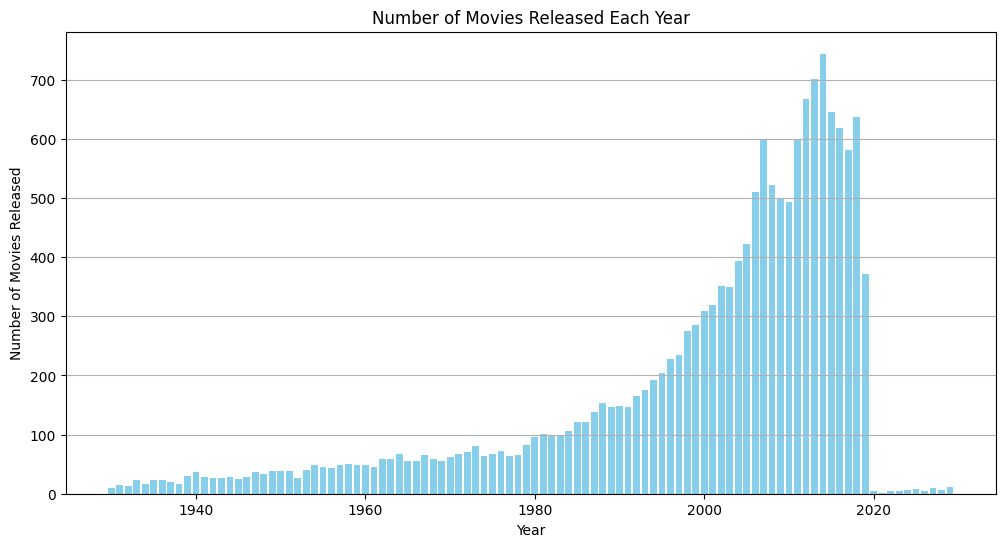

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(movies_per_year['year'], movies_per_year['release_count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.grid(axis='y')
plt.show()

* **What I see - 1:**  
From 1930 to 2007, the number of movies in theaters exhibited a relatively monotonic increase trend. There was a decline after 2008, likely due to the global financial crisis. However, post-2010, the number resumed an upward trend, reaching peak in year 2014. After that, there was a subsequent decline from 2015 to 2019.







In [11]:
df['stream_year'] = pd.to_datetime(df['on_streaming_date']).dt.year

In [12]:
df[~df.in_theater_year.isnull()]['in_theater_year'] == df[~df.in_theater_year.isnull()]['stream_year']

0         True
1         True
2        False
3        False
4        False
         ...  
16632    False
16633     True
16634    False
16635    False
16636    False
Length: 15822, dtype: bool

In [13]:
sum(df[~df.in_theater_year.isnull()]['in_theater_year'] == df[~df.in_theater_year.isnull()]['stream_year'])

6050

* **What I see - 2:**  
There 're 6051 files were released both in theaters and on streaming within a single year."

* **Assumptions:**  
For records that in_theaters_date is not given, that file was not released in theaters.

### 2. Looking only at movies that were released in theatres before 2010:
- Find the 5 highest rated movies by critics (critic_rating)
- Find the 5 highest rated movies by the general audience (audience_rating)
- Take a look at the movie titles – these top movies don’t seem very popular

In [14]:
df_before_2k10 = df[df.in_theater_year < 2010]

In [15]:
# one way to do
top5_critic_rated = df_before_2k10.sort_values(by=['critic_rating', 'critic_count'], ascending=[False,False]).head(5)
top5_critic_rated[['movie_title']]

,movie_title
15414,Toy Story 2
9461,Man on Wire
13473,Taxi to the Dark Side
15413,Toy Story
4389,Citizen Kane


In [16]:
# another way to do that
top5_critic_rated_2 = df_before_2k10.sort_values(by=['critic_rating'], ascending=[False]).head(5)
top5_critic_rated_2[['movie_title']]

,movie_title
10695,On Moonlight Bay
10383,A New Leaf
819,Red Dust
4227,A Charlie Brown Thanksgiving
466,The Gunfighter


In [17]:
top5_audience_rated = df_before_2k10.sort_values(by=['audience_rating','audience_count'], ascending=[False,False]).head(5)
top5_audience_rated[['movie_title']]

,movie_title
3196,Been Rich All My Life
1288,La Ciudad (The City)
1800,Ice People
215,Prima Ballerina
12434,The Shawshank Redemption


In [18]:
top5_audience_rated_2 = df_before_2k10.sort_values(by=['audience_rating'], ascending=[False]).head(5)
top5_audience_rated_2[['movie_title']]

,movie_title
1288,La Ciudad (The City)
3196,Been Rich All My Life
215,Prima Ballerina
1800,Ice People
13132,Stop Making Sense


### 3. Create a new DataFrame containing only “popular” movies that were released in theatres before 2010.
- Assume popular movies are those with more audience reviews than the average number of audience reviews of all movies before 2010
- Find the 5 highest rated movies by critics (critic_rating)
- Find the 5 highest rated movies by the general audience (audience_rating)
- Take a look at the movie titles – these top movies should make more sense

In [19]:
df_before_2k10 = df[df.in_theater_year < 2010]
df_before_2k10.head(2)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,critic_rating,critic_count,audience_rating,audience_count,in_theater_year,stream_year
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,68,22,53.0,14670.0,1979.0,1997.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,100,51,97.0,105000.0,1957.0,2001.0


In [20]:
average_audience_reviews = df_before_2k10['audience_count'].mean()
print(f"Average Audience Reviews for Movies before 2010 : {average_audience_reviews}")

Average Audience Reviews for Movies before 2010 : 246539.70603484032


In [21]:
df_pop_2k10 = df_before_2k10[df_before_2k10.audience_count >= average_audience_reviews]
df_pop_2k10.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,critic_rating,critic_count,audience_rating,audience_count,in_theater_year,stream_year
5,"10,000 B.C.",A young outcast from a primitive tribe is forc...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Roland Emmerich, Harald Kloser","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,2008-06-24,109.0,Warner Bros. Pictures,8,148,37.0,411087.0,2008.0,2008.0
30,Ultraviolet,In the late 21st a disease called Hemophagia h...,An incomprehensible and forgettable sci-fi thr...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",2006-03-03,2006-06-27,88.0,Sony Pictures,8,83,30.0,279966.0,2006.0,2006.0
50,Aliens,"Big-budget special effects, swiftly paced acti...","While Alien was a marvel of slow-building, atm...",R,"Action & Adventure, Horror, Science Fiction & ...",James Cameron,James Cameron,"Sigourney Weaver, Carrie Henn, Michael Biehn, ...",1986-07-18,1999-06-01,138.0,20th Century Fox,99,72,94.0,429158.0,1986.0,1999.0
84,The Happening,"""The Happening"" is a lightning-paced, heart-po...","The Happening begins with promise, but unfortu...",R,"Drama, Mystery & Suspense, Science Fiction & F...",M. Night Shyamalan,M. Night Shyamalan,"Mark Wahlberg, Zooey Deschanel, John Leguizamo...",2008-06-11,2008-10-07,90.0,20th Century Fox,18,179,24.0,370131.0,2008.0,2008.0
93,Disney's A Christmas Carol,Ebenezer Scrooge begins the Christmas holiday ...,Robert Zemeckis' 3-D animated take on the Dick...,PG,"Animation, Drama, Kids & Family, Science Ficti...",Robert Zemeckis,Robert Zemeckis,"Colin Firth, Leslie Zemeckis, Cary Elwes, Robi...",2009-11-06,2010-11-16,96.0,Walt Disney Studios,53,197,58.0,776113.0,2009.0,2010.0


In [22]:
# answer 1
top5_critic_rated_pop = df_pop_2k10.sort_values(by=['critic_rating', 'critic_count'], ascending=[False,False]).head(5)
top5_critic_rated_pop[['movie_title', 'in_theaters_date']]

,movie_title,in_theaters_date
15414,Toy Story 2,1999-11-24
15413,Toy Story,1995-11-22
13526,The Terminator,1984-10-26
11192,Pinocchio,1940-02-07
9586,Mary Poppins,1964-08-26


In [23]:
# answer 2
top5_audience_rated_pop = df_pop_2k10.sort_values(by=['audience_rating','audience_count'], ascending=[False,False]).head(5)
top5_audience_rated_pop[['movie_title', 'in_theaters_date']]

,movie_title,in_theaters_date
12434,The Shawshank Redemption,1994-09-10
6703,The Godfather,1972-03-24
5675,Star Wars: Episode V - The Empire Strikes Back,1980-06-20
834,GoodFellas,1990-09-19
12203,Schindler's List,1993-12-15


### 4. Using your new DataFrame (popular movies released in theatres before 2010), answer the following questions about the rating column:
- What percent of movies fall under each type of rating (R, PG-13, etc.)? What are your takeaways from the summary table?
- Create a visualization that shows for each rating (R, PG-13, etc.), the average critic rating and the average audience rating. What are your takeaways from the visualization?


**What percent of movies fall under each type of rating (R, PG-13, etc.)? What are your takeaways from the summary table?**

- PG-13: Most common, appealing to a broad audience while containing moderate content.
- R: Second most common, catering to adults with mature themes.
- PG: Less common, suggesting a narrower market for family films with some mature content.
- G: Rare, indicating limited production of content suitable for all ages.
- NR: Nearly nonexistent, showing the rarity of films outside the standard rating system.

***Conclusion*** : The mot popular movies before 2010 contain contents not suitable for teenagers below 17 and 13 years. 

**Create a visualization that shows for each rating (R, PG-13, etc.), the average critic rating and the average audience rating. What are your takeaways from the visualization?**

- **G-Rated Films**: Highest ratings, indicating universal appeal and family-oriented content.
- **R-Rated Films**: Audience ratings exceed critic ratings, reflecting a preference for mature content among viewers.
- **PG-13 Films**: More popular with audiences, especially with teens and young adults.
- **PG Films**: Balanced ratings, suggesting content that is suitable for a wider age range.
- **NR (Not Rated) Films**: Lowest ratings, likely due to niche appeal or less mainstream availability

In [24]:
df_pop_2k10['rating'].unique()

array(['PG-13', 'R', 'PG', 'G', 'NR'], dtype=object)

In [25]:
sum(df_pop_2k10.rating.isnull())

0

In [31]:
total_pop_movies = df_pop_2k10.shape[0]
pop_movies_rating = df_pop_2k10.rating.value_counts().reset_index()
pop_movies_rating.rename(columns={'count' : 'movie_count'},inplace=True)
pop_movies_rating['movie_percent'] = pop_movies_rating['movie_count'].apply(lambda x : round(int(x) / total_pop_movies * 100,2))
pop_movies_rating

,rating,movie_count,movie_percent
0,PG-13,415,41.62
1,R,322,32.30
2,PG,195,19.56
3,G,64,6.42
4,NR,1,0.10


In [32]:
rating_dist = df_pop_2k10.groupby('rating')[['critic_rating', 'audience_rating']].mean().reset_index().sort_values(by=['critic_rating'])
rating_dist

,rating,critic_rating,audience_rating
1,NR,36.000000,41.000000
3,PG-13,49.173494,62.590361
2,PG,59.266667,65.266667
4,R,61.832298,71.270186
0,G,77.765625,74.781250


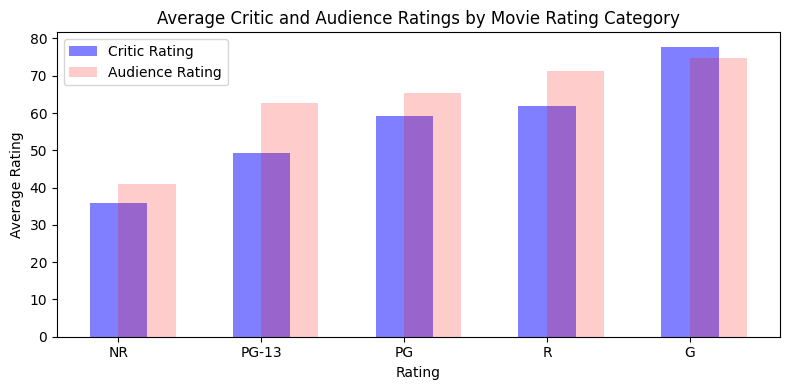

In [33]:
plt.figure(figsize=(8, 4))

# Plotting both critic and audience ratings
width = 0.4  # the width of the bars
r = range(len(rating_dist))

plt.bar(r, rating_dist['critic_rating'], color='blue', width=width, label='Critic Rating', align='center', alpha=0.5)
plt.bar(r, rating_dist['audience_rating'], color='red', width=width, label='Audience Rating', align='edge', alpha=0.2)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel('Rating')
plt.ylabel('Average Rating')
plt.title('Average Critic and Audience Ratings by Movie Rating Category')
plt.xticks(r, rating_dist['rating'])
plt.legend()
plt.tight_layout()
plt.show()

## 5. Create a pair plot of the new DataFrame. What are 3 insights you can takeaway from looking at the pair plot?

In [34]:
df_pop_2k10.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,critic_rating,critic_count,audience_rating,audience_count,in_theater_year,stream_year
5,"10,000 B.C.",A young outcast from a primitive tribe is forc...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Roland Emmerich, Harald Kloser","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,2008-06-24,109.0,Warner Bros. Pictures,8,148,37.0,411087.0,2008.0,2008.0
30,Ultraviolet,In the late 21st a disease called Hemophagia h...,An incomprehensible and forgettable sci-fi thr...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",2006-03-03,2006-06-27,88.0,Sony Pictures,8,83,30.0,279966.0,2006.0,2006.0
50,Aliens,"Big-budget special effects, swiftly paced acti...","While Alien was a marvel of slow-building, atm...",R,"Action & Adventure, Horror, Science Fiction & ...",James Cameron,James Cameron,"Sigourney Weaver, Carrie Henn, Michael Biehn, ...",1986-07-18,1999-06-01,138.0,20th Century Fox,99,72,94.0,429158.0,1986.0,1999.0
84,The Happening,"""The Happening"" is a lightning-paced, heart-po...","The Happening begins with promise, but unfortu...",R,"Drama, Mystery & Suspense, Science Fiction & F...",M. Night Shyamalan,M. Night Shyamalan,"Mark Wahlberg, Zooey Deschanel, John Leguizamo...",2008-06-11,2008-10-07,90.0,20th Century Fox,18,179,24.0,370131.0,2008.0,2008.0
93,Disney's A Christmas Carol,Ebenezer Scrooge begins the Christmas holiday ...,Robert Zemeckis' 3-D animated take on the Dick...,PG,"Animation, Drama, Kids & Family, Science Ficti...",Robert Zemeckis,Robert Zemeckis,"Colin Firth, Leslie Zemeckis, Cary Elwes, Robi...",2009-11-06,2010-11-16,96.0,Walt Disney Studios,53,197,58.0,776113.0,2009.0,2010.0


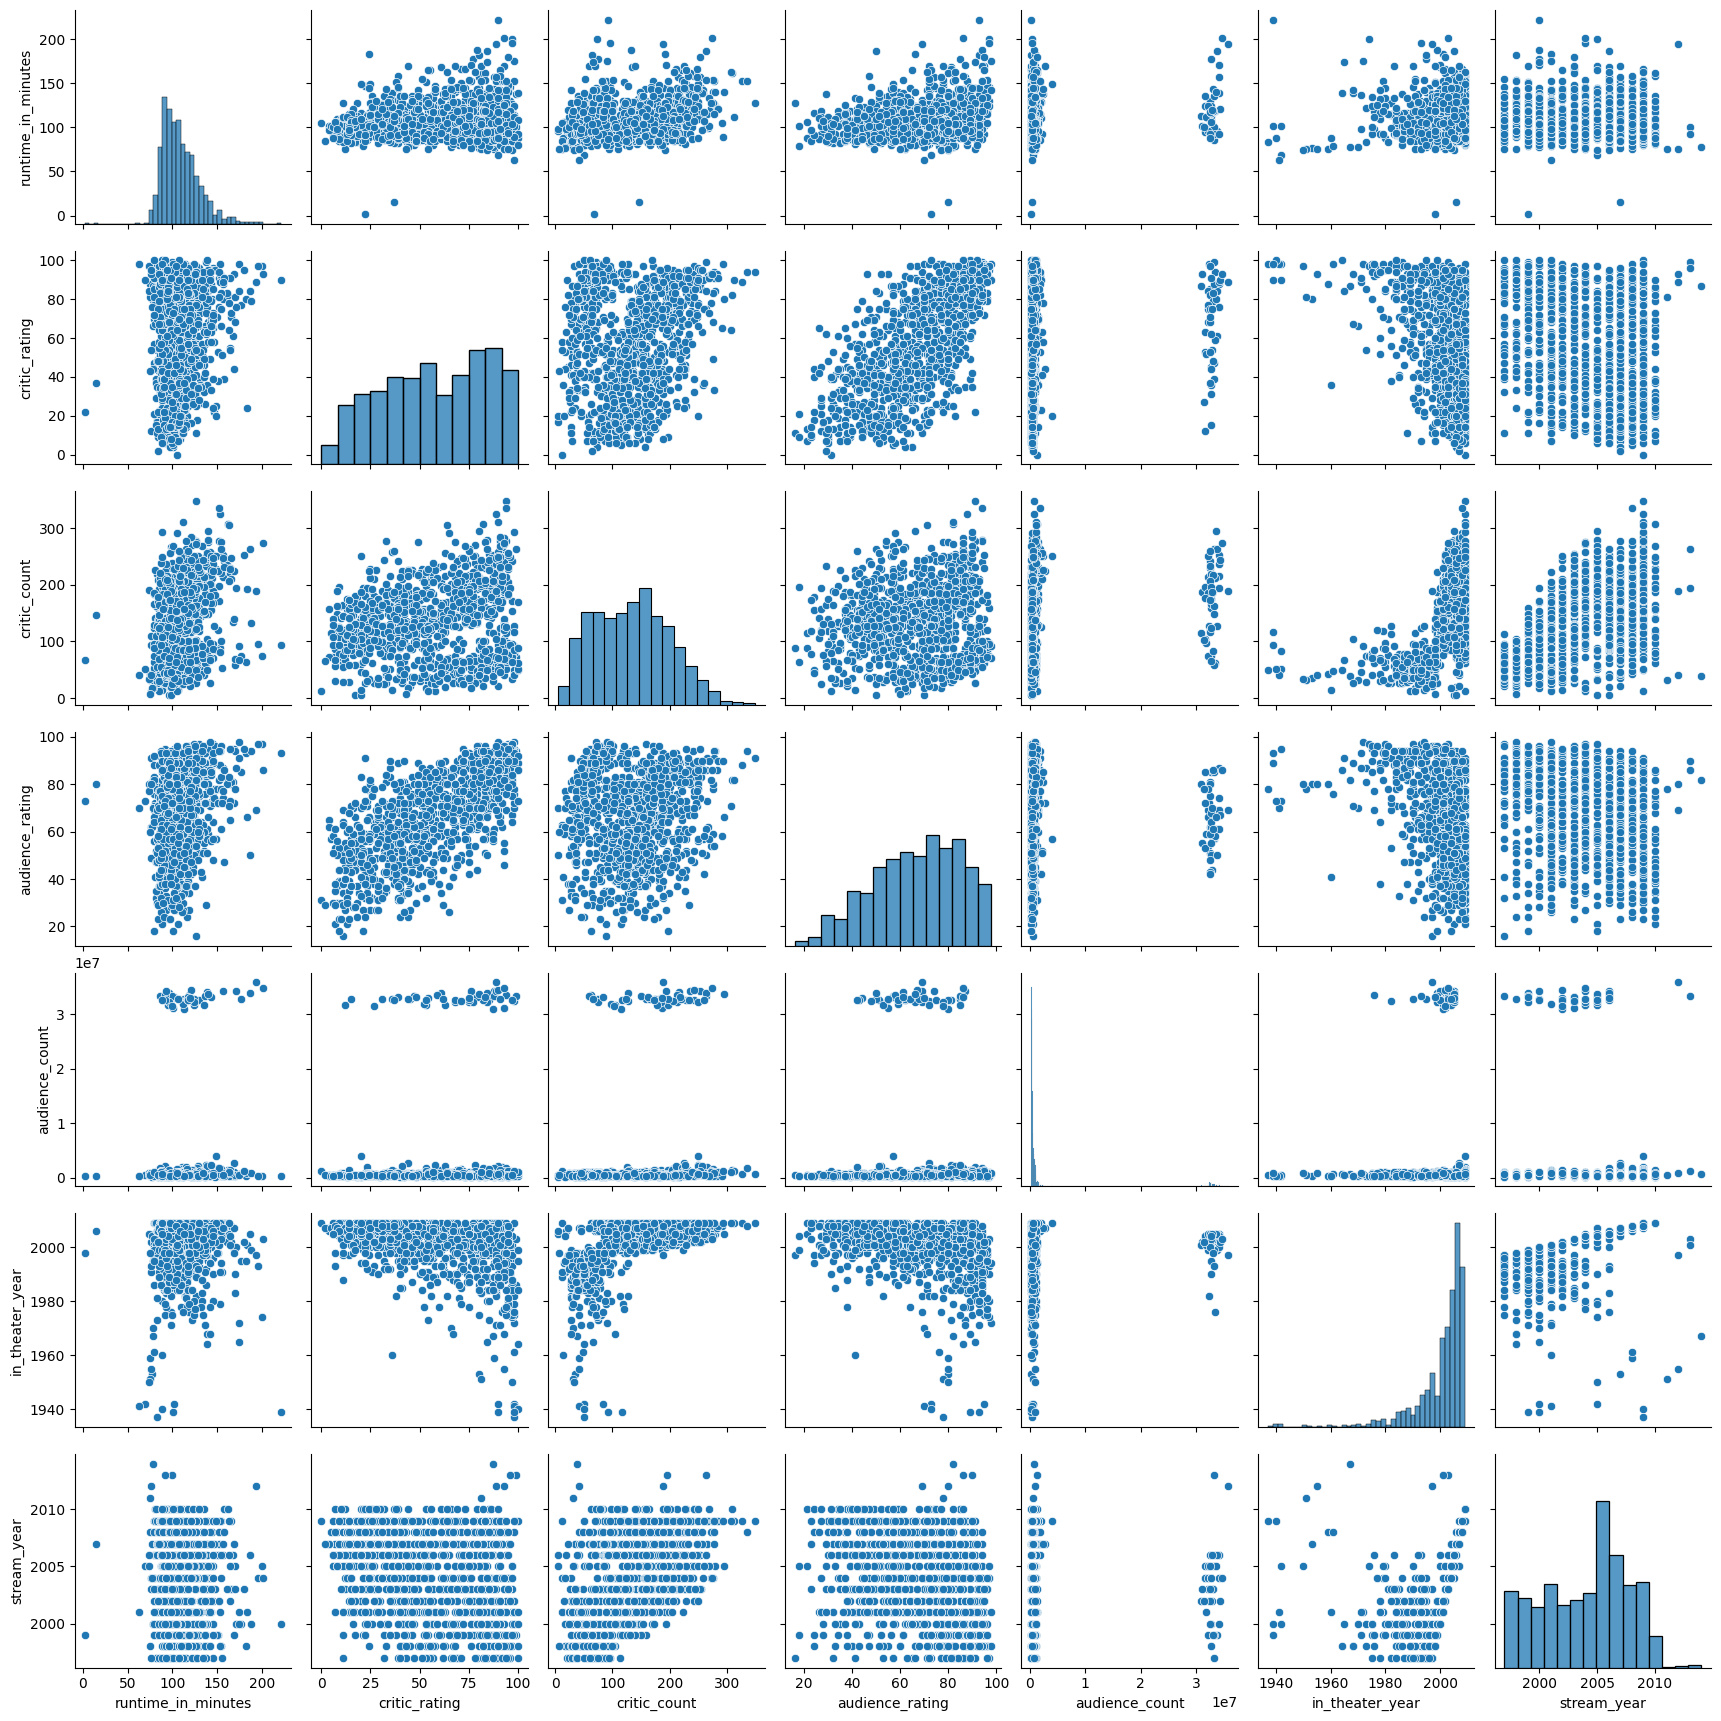

In [38]:
sns.pairplot(df_pop_2k10)
plt.show()

**takeaways:**
- critic_rating and audience_rating are positively correlated.
- most of variables are normally distributed, expect in_theater_year and audience_count
- audience_count is either very big or very small.

## 6. Using either pandas or data visualizations, find 3 more insights using any columns in the new DataFrame.

In [39]:
df_pop_2k10.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count,in_theater_year,stream_year
count,997,997,997.000000,997.000000,997.000000,997.000000,9.970000e+02,997.000000,997.000000
mean,2000-12-22 20:56:34.182547584,2004-08-06 11:50:36.710130432,109.264794,57.058175,134.504514,66.678034,2.155871e+06,2000.434303,2004.074223
min,1937-12-21 00:00:00,1997-03-26 00:00:00,2.000000,0.000000,5.000000,16.000000,2.465920e+05,1937.000000,1997.000000
25%,1998-07-29 00:00:00,2001-08-07 00:00:00,94.000000,36.000000,78.000000,53.000000,3.390820e+05,1998.000000,2001.000000
50%,2004-03-19 00:00:00,2004-12-21 00:00:00,105.000000,58.000000,134.000000,69.000000,4.333150e+05,2004.000000,2004.000000
75%,2007-03-12 00:00:00,2007-09-04 00:00:00,120.000000,81.000000,182.000000,82.000000,6.943740e+05,2007.000000,2007.000000
max,2009-12-25 00:00:00,2014-02-11 00:00:00,222.000000,100.000000,348.000000,98.000000,3.579764e+07,2009.000000,2014.000000
std,NaN,NaN,21.397324,26.507494,65.700788,18.338288,7.073482e+06,10.157838,3.707762


In [40]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

# Cut 'critic_rating' into 5 subgroups and explicitly create a copy
df_pop_2k10 = df_pop_2k10.copy()
df_pop_2k10['critic_bins'] = pd.cut(df_pop_2k10['critic_rating'], bins=bins, labels=labels, include_lowest=True)

# Group by the new 'critic_bins' column and calculate the sum of 'audience_count'
result = df_pop_2k10.groupby('critic_bins')['audience_count'].sum().reset_index()

# Display the result
print(result)

  critic_bins  audience_count
0        0-20     115604407.0
1       20-40     254131271.0
2       40-60     398462215.0
3       60-80     606523890.0
4      80-100     774681728.0


**3 more insights**  
- critic_rating has a wider range than audience_rating.
- most of movies are relatively 2 hours long.
- those who has a higher rating are likely to owns higher audience_count, especially when rating is surpasses 60.

## Feature Engineering

### 7. Split the data into a training andt estset, with the training data including movies released in theatres before 2010 and the test data including movies released in theatres in 2010 and after.

In [45]:
df_train_full = df[df.in_theater_year < 2010]
df_test_full = df[df.in_theater_year >= 2010]
df_test_full.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,critic_rating,critic_count,audience_rating,audience_count,in_theater_year,stream_year
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,49,144,53.0,254287.0,2010.0,2010.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,86,140,64.0,11567.0,2010.0,2010.0
97,Fireflies in the Garden,"To an outsider, the Taylors are the very pictu...","Despite boasting a stellar cast, Fireflies in ...",R,Drama,Dennis Lee (III),Dennis Lee (III),"Emily Watson, Julia Roberts, Ryan Reynolds, Wi...",2011-10-14,2012-02-07,98.0,Senator Entertainment,22,54,45.0,45150.0,2011.0,2012.0


#### 8. If your goal is to predict the critic_rating before the first critic or audience rating gets posted for a movie, which columns in the data should you NOT use to create features? Update your training and test data sets to NOT include these columns.

In [46]:
features_to_exclude = ['critics_consensus','critic_rating', 'critic_count', 'audience_rating', 'audience_count']
df_train = df_train_full.drop(features_to_exclude, axis=1)
df_train.head(3)

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,in_theater_year,stream_year
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,1979.0,1997.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,1957.0,2001.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,1954.0,2003.0


In [47]:
features_to_exclude = ['critics_consensus','critic_rating', 'critic_count', 'audience_rating', 'audience_count']
df_test = df_test_full.drop(features_to_exclude, axis=1)
df_test.head(3)

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,in_theater_year,stream_year
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,2010.0,2010.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,2010.0,2010.0
97,Fireflies in the Garden,"To an outsider, the Taylors are the very pictu...",R,Drama,Dennis Lee (III),Dennis Lee (III),"Emily Watson, Julia Roberts, Ryan Reynolds, Wi...",2011-10-14,2012-02-07,98.0,Senator Entertainment,2011.0,2012.0


## 9. Using only the training data,create a new DataFrame containing the following ID column and features:
• movie_title  
• runtime_in_minutes  
• NEW: kid_friendly (1 if G or PG, 0 if other ratings)  
• NEW: dummy variable columns for each genre


In [85]:
import warnings
warnings.filterwarnings('ignore')

In [317]:
genre_list = []
for idx,row in df_train_full.iterrows():
    try:
        tmp_list = row['genre'].split(', ')
        for genre in tmp_list:
            if genre not in genre_list:
                genre_list.append(genre)
    except Exception as e:
        print(e)
        print(row['genre'])
genre_list

'float' object has no attribute 'split'
nan


['Comedy',
 'Romance',
 'Classics',
 'Drama',
 'Action & Adventure',
 'Kids & Family',
 'Mystery & Suspense',
 'Western',
 'Art House & International',
 'Horror',
 'Faith & Spirituality',
 'Animation',
 'Documentary',
 'Special Interest',
 'Science Fiction & Fantasy',
 'Sports & Fitness',
 'Musical & Performing Arts',
 'Television',
 'Cult Movies',
 'Anime & Manga',
 'Gay & Lesbian']

In [246]:
def get_dummies_for_genre(df):
    genre_data = []
    for idx,row in df.iterrows():
        genre_dict = {genre : 0 for genre in genre_list}
        genre_dict['movie_title'] = row['movie_title']
        genre_dict['runtime_in_minutes'] = row['runtime_in_minutes']
        genre_dict['kid_friendly'] = row['kid_friendly']
        genre_dict['critic_rating'] = row['critic_rating']
        try:
            tmp_list = row['genre'].split(', ')
            for genre_type in genre_list:
                if genre_type in tmp_list:
                    genre_dict[genre_type] = 1      
        except Exception as e:
            print(f"Error in Splitting the Genre")
            print(f"Given Val : {row['genre']}")
        genre_data.append(genre_dict)
    return pd.DataFrame(genre_data)

def prepare_data(df):
    df_final = df[['movie_title', 'runtime_in_minutes', 'genre','critic_rating']]
    df_final['kid_friendly'] = df['rating'].isin(['G', 'PG']).astype(int)
    df_final= get_dummies_for_genre(df_final)
    return df_final
    

In [247]:
df_train_final = prepare_data(df_train_full)
print(f"Final train Shape : {df_train_final.shape}")

Error in Splitting the Genre
Given Val : nan
Final train Shape : (9703, 25)


### 10.Create 3 new features that you think will do a good job predicting the critic_rating. Each new feature should use various combinations of the columns from your training data.


In [132]:
director_rating = df_train_full.groupby('directors')['critic_rating'].mean().reset_index().sort_values(by='critic_rating', ascending=False)
director_rating.head()

,directors,critic_rating
2193,"John Huston, John Houston",100.0
3396,Peter Bate,100.0
387,Bernhard Wicki,100.0
1635,Harry Moses,100.0
1879,Jaromil Jires,100.0


In [134]:
director_rating[director_rating.critic_rating == 100].shape

(149, 2)

In [39]:
# add studio
training_final['studio'] = training_full['studio_name'].astype('category')
training_final

,movie_title,runtime_in_minutes,kid_friendly,genre_dummie,studio
2,10,118.0,0,"Comedy, Romance",Waner Bros.
3,12 Angry Men (Twelve Angry Men),95.0,0,"Classics, Drama",Criterion Collection
4,"20,000 Leagues Under The Sea",127.0,1,"Action & Adventure, Drama, Kids & Family",Disney
5,"10,000 B.C.",109.0,0,"Action & Adventure, Classics, Drama",Warner Bros. Pictures
6,The 39 Steps,87.0,0,"Action & Adventure, Classics, Mystery & Suspense",Gaumont British Distributors
...,...,...,...,...,...
16631,Zoom,88.0,1,"Action & Adventure, Comedy, Kids & Family",Sony Pictures Entertainment
16632,Zoot Suit,104.0,0,"Drama, Musical & Performing Arts",MCA Universal Home Video
16634,Zorba the Greek,142.0,0,"Action & Adventure, Art House & International,...",Fox
16635,Zulu,139.0,1,"Classics, Drama",Paramount Pictures


In [42]:
# add director
training_final['directors'] = training_full['directors'].astype('category')
training_final

,movie_title,runtime_in_minutes,kid_friendly,genre_dummie,studio,release_day,directors
2,10,118.0,0,"Comedy, Romance",Waner Bros.,1979-10-05,Blake Edwards
3,12 Angry Men (Twelve Angry Men),95.0,0,"Classics, Drama",Criterion Collection,1957-04-13,Sidney Lumet
4,"20,000 Leagues Under The Sea",127.0,1,"Action & Adventure, Drama, Kids & Family",Disney,1954-01-01,Richard Fleischer
5,"10,000 B.C.",109.0,0,"Action & Adventure, Classics, Drama",Warner Bros. Pictures,2008-03-07,Roland Emmerich
6,The 39 Steps,87.0,0,"Action & Adventure, Classics, Mystery & Suspense",Gaumont British Distributors,1935-06-06,Alfred Hitchcock
...,...,...,...,...,...,...,...
16631,Zoom,88.0,1,"Action & Adventure, Comedy, Kids & Family",Sony Pictures Entertainment,2006-08-11,Peter Hewitt
16632,Zoot Suit,104.0,0,"Drama, Musical & Performing Arts",MCA Universal Home Video,1981-10-02,Luis Valdez
16634,Zorba the Greek,142.0,0,"Action & Adventure, Art House & International,...",Fox,1964-12-17,NaN
16635,Zulu,139.0,1,"Classics, Drama",Paramount Pictures,1964-06-17,"Cy Endfield, Cyril Endfield"


In [43]:
# add release day
training_final['release_day'] = np.where(
    training_full['on_streaming_date'] >= training_full['in_theaters_date'],
    (training_full['in_theaters_date']),
    (training_full['on_streaming_date']))
training_final

,movie_title,runtime_in_minutes,kid_friendly,genre_dummie,studio,release_day,directors
2,10,118.0,0,"Comedy, Romance",Waner Bros.,1979-10-05,Blake Edwards
3,12 Angry Men (Twelve Angry Men),95.0,0,"Classics, Drama",Criterion Collection,1957-04-13,Sidney Lumet
4,"20,000 Leagues Under The Sea",127.0,1,"Action & Adventure, Drama, Kids & Family",Disney,1954-01-01,Richard Fleischer
5,"10,000 B.C.",109.0,0,"Action & Adventure, Classics, Drama",Warner Bros. Pictures,2008-03-07,Roland Emmerich
6,The 39 Steps,87.0,0,"Action & Adventure, Classics, Mystery & Suspense",Gaumont British Distributors,1935-06-06,Alfred Hitchcock
...,...,...,...,...,...,...,...
16631,Zoom,88.0,1,"Action & Adventure, Comedy, Kids & Family",Sony Pictures Entertainment,2006-08-11,Peter Hewitt
16632,Zoot Suit,104.0,0,"Drama, Musical & Performing Arts",MCA Universal Home Video,1981-10-02,Luis Valdez
16634,Zorba the Greek,142.0,0,"Action & Adventure, Art House & International,...",Fox,1964-12-17,NaN
16635,Zulu,139.0,1,"Classics, Drama",Paramount Pictures,1964-06-17,"Cy Endfield, Cyril Endfield"


# Modeling

### Prob 11.
Make sure you apply the same transformations on your X_test and y_test data sets that you applied on the X_train and y_train data sets.

In [248]:
df_test_final = prepare_data(df_test_full)
print(f"Final Test Shape : {df_test_final.shape}")

Error in Splitting the Genre
Given Val : nan
Error in Splitting the Genre
Given Val : nan
Error in Splitting the Genre
Given Val : nan
Error in Splitting the Genre
Given Val : nan
Error in Splitting the Genre
Given Val : nan
Final Test Shape : (6119, 25)


## Prob 12
Make sure that your X_train, y_train, X_test and y_test data sets only contain
columns of numeric and non-null values. Explain and justify how you decide to
deal with data issues.

### Explanation

- Both train and test set contain genre feature which is a string variable. To Convert that into numeric, we have converted that into dummy variables. 

    - genre_list = [A, B, C, D] 
    - eg1: A,B   = [1, 1, 0, 0] 
    - eg2  A,C   = [1, 0, 1, 1] 
    
- Handling Null Values 
    - **Null Values in Genre** - If Null, put all 0's in dummy variables
    - **runtime_in_minutes**
        - For TrainSet only 2 out of 9703 entries have this null, so we will drop this entry as this is not a significant portion of training data
        - For TestSet, 123 entries are null which is around 2%. Since most of the test data is having around mean runtime_in_minutes (around 100), we can replace missing entries with mean

In [249]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9703 entries, 0 to 9702
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Action & Adventure         9703 non-null   int64  
 1   Animation                  9703 non-null   int64  
 2   Anime & Manga              9703 non-null   int64  
 3   Art House & International  9703 non-null   int64  
 4   Classics                   9703 non-null   int64  
 5   Comedy                     9703 non-null   int64  
 6   Cult Movies                9703 non-null   int64  
 7   Documentary                9703 non-null   int64  
 8   Drama                      9703 non-null   int64  
 9   Faith & Spirituality       9703 non-null   int64  
 10  Gay & Lesbian              9703 non-null   int64  
 11  Horror                     9703 non-null   int64  
 12  Kids & Family              9703 non-null   int64  
 13  Musical & Performing Arts  9703 non-null   int64

In [250]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6119 entries, 0 to 6118
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Action & Adventure         6119 non-null   int64  
 1   Animation                  6119 non-null   int64  
 2   Anime & Manga              6119 non-null   int64  
 3   Art House & International  6119 non-null   int64  
 4   Classics                   6119 non-null   int64  
 5   Comedy                     6119 non-null   int64  
 6   Cult Movies                6119 non-null   int64  
 7   Documentary                6119 non-null   int64  
 8   Drama                      6119 non-null   int64  
 9   Faith & Spirituality       6119 non-null   int64  
 10  Gay & Lesbian              6119 non-null   int64  
 11  Horror                     6119 non-null   int64  
 12  Kids & Family              6119 non-null   int64  
 13  Musical & Performing Arts  6119 non-null   int64

In [251]:
print(f"Initial Training Data Shape : {df_train_final.shape[0]}")
df_train_final.dropna(inplace=True)
print(f"Final Training Data Shape : {df_train_final.shape[0]}")

Initial Training Data Shape : 9703
Final Training Data Shape : 9701


In [252]:
def mean_imputation(df, col):
    mean_val = df[col].mean()
    df[col] = df[col].fillna(mean_val)
    return df

In [253]:
print(f"Initial Testing Data Shape : {df_test_final.shape[0]}")
df_test_final = mean_imputation(df_test_final,'runtime_in_minutes')
print(f"Final Testing Data Shape : {df_test_final.shape[0]}")

Initial Testing Data Shape : 6119
Final Testing Data Shape : 6119


In [295]:
X_train = df_train_final.drop(columns=['critic_rating', 'movie_title'])
y_train = df_train_final[['critic_rating']]

X_test = df_test_final.drop(columns=['critic_rating', 'movie_title'])
y_test = df_test_final[['critic_rating']]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9701, 23) (9701, 1)
(6119, 23) (6119, 1)


### 13.Fit 3 linear regression models on the training data:
- Model 1: Use only runtime_in_minutes
- Model 2: Use runtime_in_minutes and kid_friendly
- Model 3: Use runtime_in_minutes, kid_friendly and the dummy columns
for the genres

In [296]:
import statsmodels.api as sm

### Model 1

In [297]:
x1 = sm.add_constant(X_train[['runtime_in_minutes']])
model1 = sm.OLS(y_train, x1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          critic_rating   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           4.22e-24
Time:                        15:54:46   Log-Likelihood:                -46259.
No. Observations:                9701   AIC:                         9.252e+04
Df Residuals:                    9699   BIC:                         9.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 49.4067      1.091     45.283      0.000      47.268      51.545
runtime_in_minutes     0.1027      0.010     10.153      0.000       0.083       0.123
==============================================================================
Omnibus:                     1174.503   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.454
Skew:                          -0.403   Prob(JB):                    1.19e-117
Kurtosis:                       2.174   Cond. No.                         407.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2

In [298]:
x2 = sm.add_constant(X_train[['runtime_in_minutes', 'kid_friendly']])
model2 = sm.OLS(y_train, x2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          critic_rating   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     59.08
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           3.13e-26
Time:                        15:54:47   Log-Likelihood:                -46252.
No. Observations:                9701   AIC:                         9.251e+04
Df Residuals:                    9698   BIC:                         9.253e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 48.7685      1.103     44.225      0.000      46.607      50.930
runtime_in_minutes     0.1032      0.010     10.206      0.000       0.083       0.123
kid_friendly           2.7058      0.700      3.864      0.000       1.333       4.079
==============================================================================
Omnibus:                     1139.477   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              534.875
Skew:                          -0.404   Prob(JB):                    7.14e-117
Kurtosis:                       2.182   Cond. No.                         414.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3

In [299]:
x3 = sm.add_constant(X_train)
model3 = sm.OLS(y_train, x3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          critic_rating   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     122.9
Date:                Sat, 18 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:54:51   Log-Likelihood:                -45067.
No. Observations:                9701   AIC:                         9.018e+04
Df Residuals:                    9677   BIC:                         9.035e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        42.4303      1.241     34.185      0.000      39.997      44.863
Action & Adventure           -5.4982      0.666     -8.259      0.000      -6.803      -4.193
Animation                    12.2793      1.692      7.256      0.000       8.962      15.597
Anime & Manga                -4.4354      8.133     -0.545      0.586     -20.377      11.506
Art House & International    12.5147      0.724     17.297      0.000      11.096      13.933
Classics                     22.3725      0.752     29.758      0.000      20.899      23.846
Comedy                       -4.5798      0.624     -7.340      0.000      -5.803      -3.357
Cult Movies                   2.5834      2.756      0.937      0.349      -2.819       7.986
Documentary                  21.2007      1.507     14.071      0.000      18.247      24.154
Drama                         8.0485      0.631     12.757      0.000       6.812       9.285
Faith & Spirituality        -11.0654      3.471     -3.188      0.001     -17.869      -4.262
Gay & Lesbian                -4.4712      3.305     -1.353      0.176     -10.950       2.008
Horror                       -5.7919      0.921     -6.290      0.000      -7.597      -3.987
Kids & Family                -4.0768      1.213     -3.361      0.001      -6.454      -1.699
Musical & Performing Arts     3.9744      1.055      3.767      0.000       1.906       6.042
Mystery & Suspense           -1.4534      0.691     -2.102      0.036      -2.809      -0.098
Romance                       1.3665      0.788      1.734      0.083      -0.178       2.911
Science Fiction & Fantasy     1.3969      0.849      1.644      0.100      -0.268       3.062
Special Interest              6.5881      1.498      4.397      0.000       3.651       9.525
Sports & Fitness              2.9945      2.741      1.092      0.275      -2.379       8.368
Television                    4.7269      2.019      2.341      0.019       0.769       8.684
Western                       6.7560      1.765      3.827      0.000       3.296      10.216
runtime_in_minutes            0.0766      0.009      8.221      0.000       0.058       0.095
kid_friendly                  3.0685      0.724      4.239      0.000       1.650       4.487
==============================================================================
Omnibus:                      372.968   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.987
Skew:                          -0.324   Prob(JB):                     9.65e-62
Kurtosis:                       2.476   Cond. No.                     3.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the er

In [306]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model_obj, X , y_true):
    X = sm.add_constant(X)
    y_pred = model_obj.predict(X).values
    y_true = y_true.values
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"MAE : {mae}, RMSE : {rmse} R2 : {r2}")
    return mae, rmse, r2


In [307]:
mae, rmse, r2 = evaluate_model(model1, X_test[['runtime_in_minutes']], y_test)

MAE : 24.482637353499587, RMSE : 28.39000312686946 R2 : 3.3772811427246197e-05


In [308]:
mae, rmse, r2 = evaluate_model(model2, X_test[['runtime_in_minutes', 'kid_friendly']], y_test)

MAE : 24.528285453840976, RMSE : 28.40204062829924 R2 : -0.0008143881929607577


In [309]:
mae, rmse, r2 = evaluate_model(model3, X_test, y_test)

MAE : 22.030246432082144, RMSE : 26.08843832666395 R2 : 0.15559534838292255


The above results are quite bad. This is clearly due to the outlier points in runtime_in_minutes as shown below. 
We need to remove the outliers from runtime_in_minutes

Text(0, 0.5, 'critic_rating')

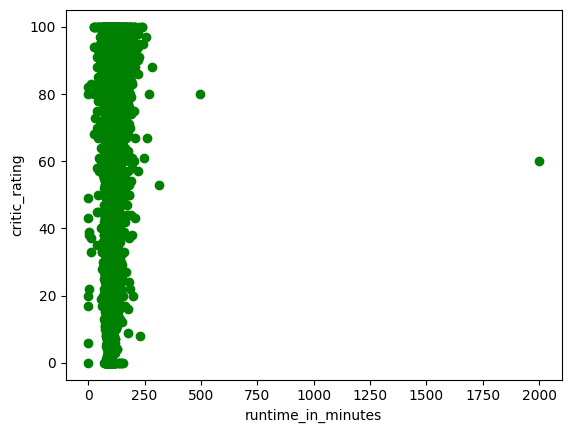

In [283]:
plt.figure()
plt.scatter(X_train['runtime_in_minutes'], y_train['critic_rating'], color='green')
plt.xlabel('runtime_in_minutes')
plt.ylabel('critic_rating')

In [284]:
df_X = pd.concat([X_train, y_train],axis=1)
df_X.shape

(9701, 24)

In [285]:
df_X['runtime_in_minutes'].describe()

count    9701.000000
mean      103.977322
std        28.594183
min         1.000000
25%        91.000000
50%       100.000000
75%       113.000000
max      2000.000000
Name: runtime_in_minutes, dtype: float64

In [286]:
def get_outlier_bound(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

In [265]:
lb, ub = get_outlier_bound(df_X['runtime_in_minutes'])
lb , ub

(61.0, 141.0)

In [287]:
df_X = df_X[(df_X.runtime_in_minutes >= lb)&(df_X.runtime_in_minutes <= ub)]
X_train = df_X.drop(columns=['critic_rating'])
y_train = df_X[['critic_rating']]

In [288]:
X_train.shape, y_train.shape

((9195, 23), (9195, 1))

Text(0, 0.5, 'critic_rating')

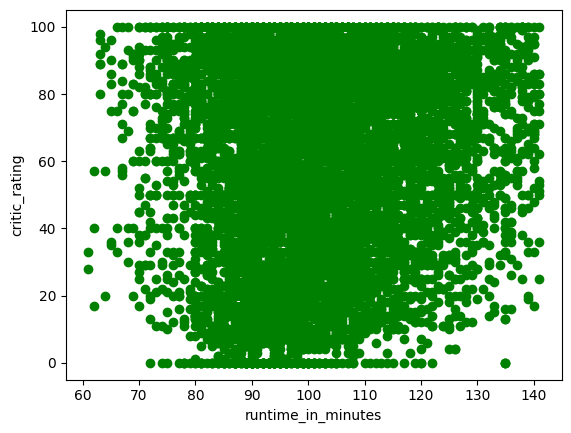

In [292]:
plt.figure()
plt.scatter(X_train['runtime_in_minutes'], y_train['critic_rating'], color='green')
plt.xlabel('runtime_in_minutes')
plt.ylabel('critic_rating')

Text(0, 0.5, 'critic_rating')

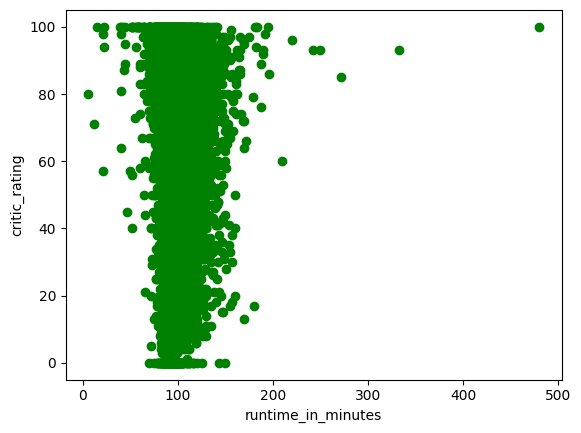

In [293]:
plt.figure()
plt.scatter(X_test['runtime_in_minutes'], y_test['critic_rating'], color='green')
plt.xlabel('runtime_in_minutes')
plt.ylabel('critic_rating')

In [294]:
x11 = sm.add_constant(X_train[['runtime_in_minutes']])
model11 = sm.OLS(y_train, x11).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          critic_rating   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           1.35e-26
Time:                        15:52:34   Log-Likelihood:                -43864.
No. Observations:                9195   AIC:                         8.773e+04
Df Residuals:                    9193   BIC:                         8.775e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 37.0482      2.101     17.630      0.000      32.929      41.168
runtime_in_minutes     0.2195      0.021     10.707      0.000       0.179       0.260
==============================================================================
Omnibus:                     3181.912   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.699
Skew:                          -0.319   Prob(JB):                    5.39e-129
Kurtosis:                       1.935   Cond. No.                         724.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""